# This is problem 2

## Exploratory Data Analysis (EDA) of Groundwater Quality in California Central Valley Without/with Using CODA.

In this analysis of groundwater quality in the California Central Valley dataset, the primary goal is to conduct an exploratory data analysis (EDA) to identify the most interesting patterns and relationships within the given dataset, which can guide further investigations. Firstly I'll conduct the analysis without uing CODA to provide what we believe are the most interesting plots that reveal key insights into the geochemical processes occurring in the region. The first part of the analysis focuses on loading the data, preprocess the data, look at the summary statistics and the pairwise correlation matrix, which offer foundational insights for understanding how different geochemical elements such as Cr(VI), Mn, Fe, NO3, SO4, and others behave across various groundwater samples. However, I wont focus on the geochemist's role but rather the data insights and interpretations. 

In [2]:
# Firstly I'll import all my necessary libraries for the analaysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Now I'll load my data which i have renamed hw2.csv for easy reading.

file_path = "D:/RobertSichomba/HomeWork2/data/hw2.csv"

def data(file_path: str) -> pd.DataFrame:
    """Here I Load and display basic information of the given dataset, I'll simply just name it data"""
    try:
        df = pd.read_csv(file_path)
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print("\nFirst 5 rows:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Here we Load the dataset
data = data(file_path)


Rows: 683, Columns: 29

First 5 rows:
    Latitude   Longitude SOURCE  SOURCE.NAM  OTHER.NAME     WELL.ID  Al (ppb)  \
0  39.767667 -121.781556   USGS  CAMP-ES-15  CAMP-ES-15  CAMP-ES-15       2.6   
1  37.757111 -120.799278   USGS   CE-QPC-01   CE-QPC-01   CE-QPC-01       6.6   
2  37.757111 -120.799278   USGS   CE-QPC-01   CE-QPC-01   CE-QPC-01       1.5   
3  38.287528 -121.328972   USGS      COS-08      COS-08      COS-08       3.4   
4  38.287528 -121.328972   USGS      COS-08      COS-08      COS-08       1.3   

   As (ppb)  Ba (ppb)  Ca (ppb)  ...  Ni (ppb)  NO3 (ppb)  Pb (ppb)  Se (ppb)  \
0      0.79      8.62     17700  ...      0.28        474     0.341      0.05   
1      1.20     43.10     24400  ...      1.18       4390     2.690      0.05   
2      1.30     43.20     22800  ...      0.20       4340     1.130      0.08   
3     21.90    154.00      9430  ...      0.20        238     0.040      0.09   
4     21.50    152.00      9470  ...      0.21        298     0.080   

In [4]:
# Before looking at the summary stats, I'll check for any missing values.

print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Latitude      0
Longitude     0
SOURCE        0
SOURCE.NAM    0
OTHER.NAME    0
WELL.ID       0
Al (ppb)      0
As (ppb)      0
Ba (ppb)      0
Ca (ppb)      0
Cl (ppb)      0
Cr (ppb)      0
Cu (ppb)      0
F (ppb)       0
Fe (ppb)      0
K (ppb)       0
Mg (ppb)      0
Mn (ppb)      0
Mo (ppb)      0
Ni (ppb)      0
NO3 (ppb)     0
Pb (ppb)      0
Se (ppb)      0
SO4 (ppb)     0
Sr (ppb)      0
U (ppb)       0
V (ppb)       0
Zn (ppb)      0
Cr_level      0
dtype: int64


Well we happen not to have any missing values in our data, which is great!


In [5]:
#This is the Summary Statistics (Mean & Standard Deviation) for the given dataset respectively.

summary_stats = data.describe().T[['mean', 'std']]
print("\nSummary Statistics (Mean & Std Dev):")
print(summary_stats)


Summary Statistics (Mean & Std Dev):
                   mean            std
Latitude      37.706735       1.403051
Longitude   -120.756262       1.049880
Al (ppb)       8.444802      52.907461
As (ppb)       6.249004      13.598172
Ba (ppb)     115.395461     278.938183
Ca (ppb)   48163.106881   62228.573187
Cl (ppb)   76739.341142  261466.163699
Cr (ppb)       3.110996       4.708021
Cu (ppb)       1.557174       1.742745
F (ppb)      216.251830     286.801567
Fe (ppb)     110.743192    1067.856147
K (ppb)     2683.748170    2196.518308
Mg (ppb)   20761.102489   28938.214764
Mn (ppb)      99.855608     747.059257
Mo (ppb)       4.817659      12.135596
Ni (ppb)       1.001903       2.552925
NO3 (ppb)   4045.368960    6615.122303
Pb (ppb)       0.544381       2.431069
Se (ppb)       0.901274       3.413577
SO4 (ppb)  76275.651537  179598.311265
Sr (ppb)     518.475666     666.279904
U (ppb)        9.875018      33.846140
V (ppb)       14.477613      13.159729
Zn (ppb)      13.698272   

The above summary statistics of the dataset including the mean and standard deviation, provide key visible insights into the overall distribution and variability of the groundwater samples. The mean values of several key elements, such as Calcium (Ca) and Chloride (Cl), are quite high. Also their standard deviations are also large indicating substantial variability in the concentrations of these elements.From the summary stats it can also be observed that Manganese (Mn) and Chromium (Cr) show relatively lower mean concentrations but both elements have large standard deviations reflecting significant spatial variability. These variations are crucial for understanding the complex processes.

All specified columns are present in the dataset.
Columns included in analysis: ['Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)', 'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)', 'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)', 'Sr (ppb)', 'U (ppb)', 'V (ppb)', 'Zn (ppb)']

Missing Values:
 Series([], dtype: int64)


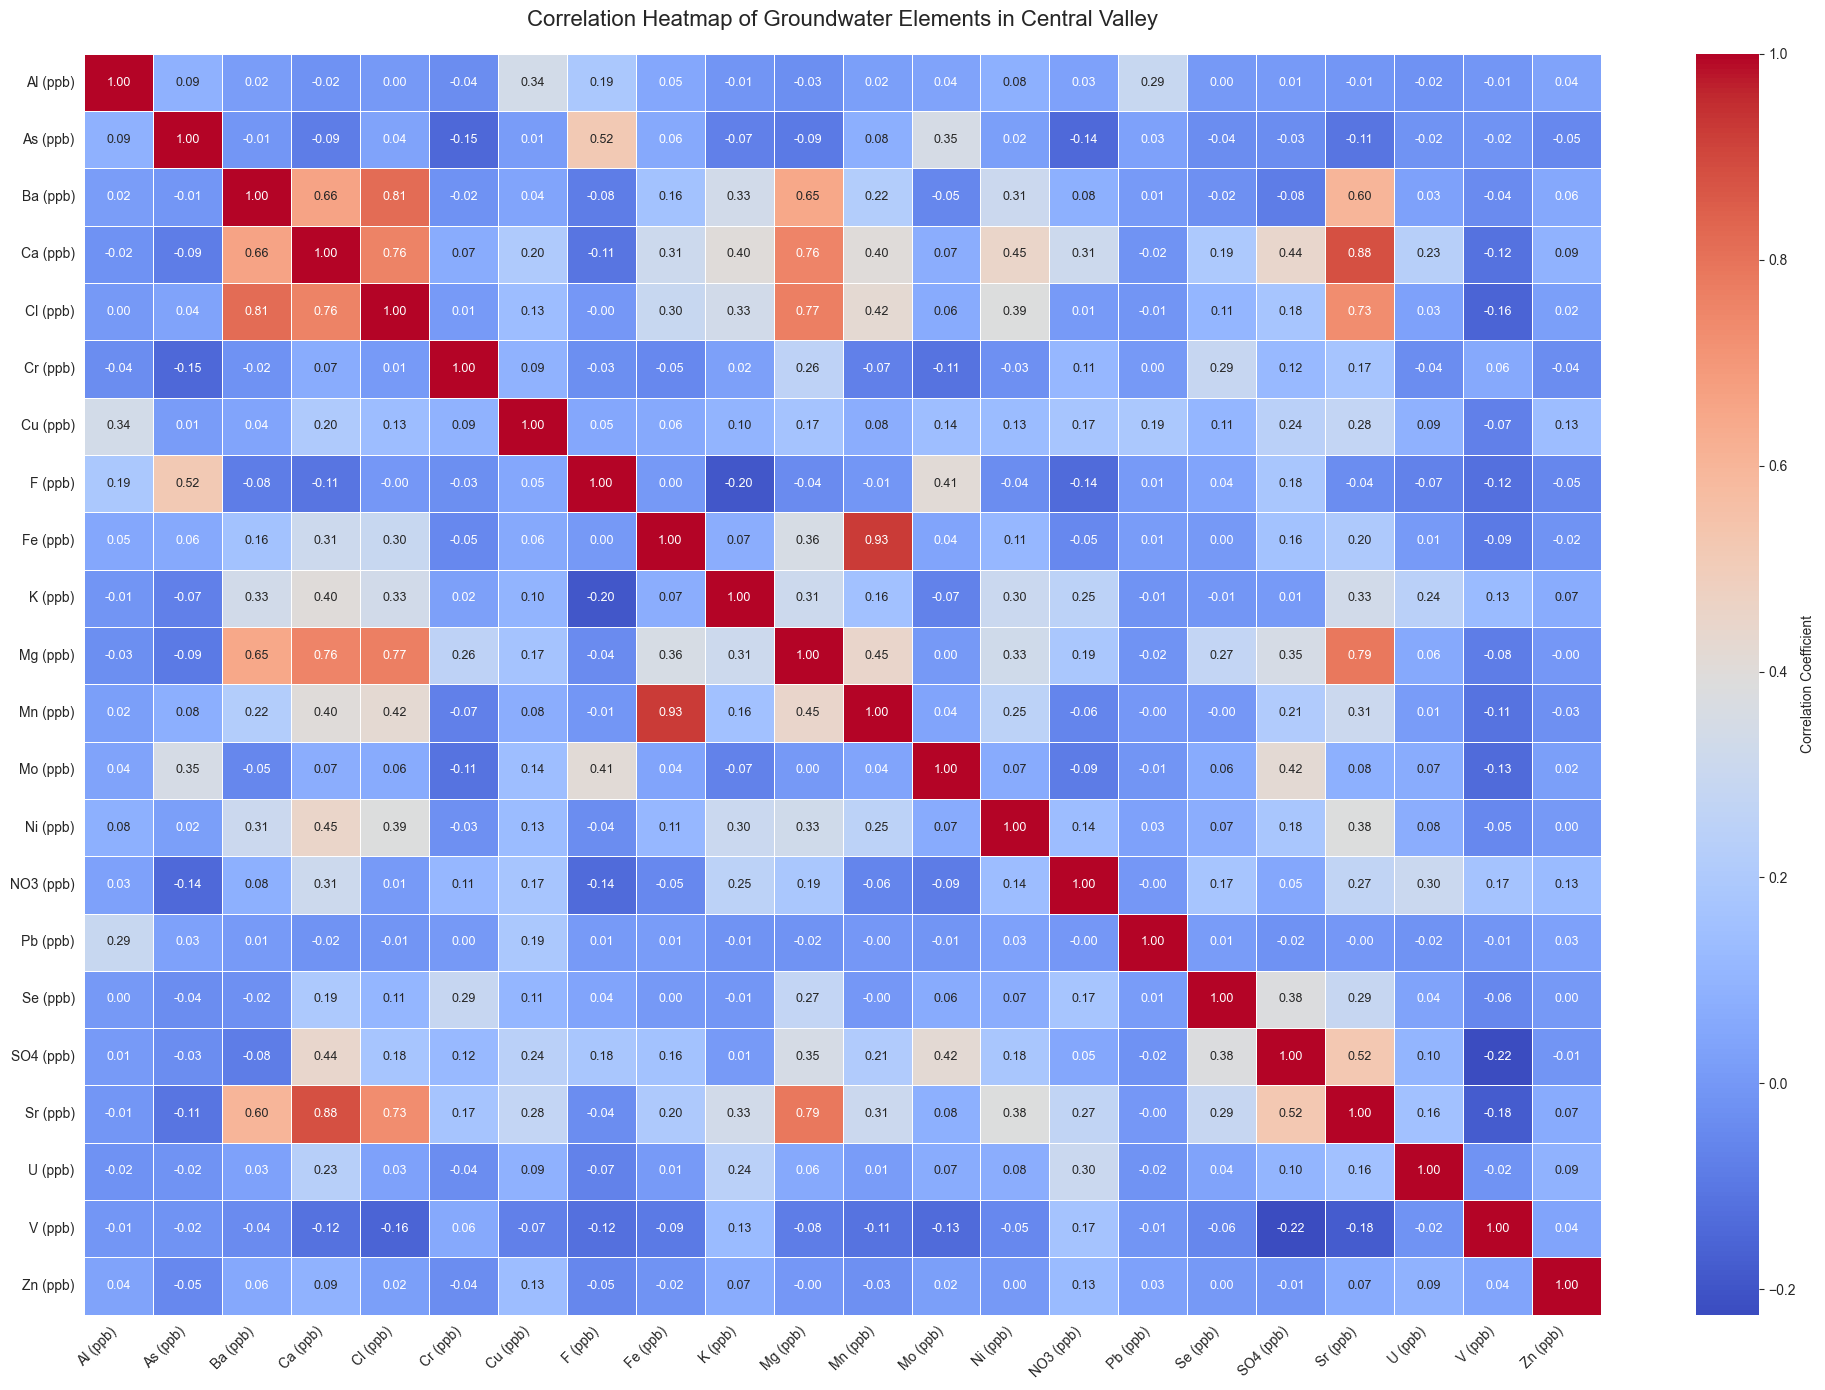

In [6]:


# Here we plot the correlation matrix for the dataset as part of the problemset 
data.columns =data.columns.str.strip()
element_columns = [
    'Al (ppb)', 'As (ppb)', 'Ba (ppb)', 'Ca (ppb)', 'Cl (ppb)', 'Cr (ppb)',
    'Cu (ppb)', 'F (ppb)', 'Fe (ppb)', 'K (ppb)', 'Mg (ppb)', 'Mn (ppb)',
    'Mo (ppb)', 'Ni (ppb)', 'NO3 (ppb)', 'Pb (ppb)', 'Se (ppb)', 'SO4 (ppb)',
    'Sr (ppb)', 'U (ppb)', 'V (ppb)', 'Zn (ppb)',
]

# After liting the columns we verify columns existance in the dataset
existing_cols = [col for col in element_columns if col in data.columns]
missing_cols = set(element_columns) - set(existing_cols)

if missing_cols:
    print(f"Warning: The following columns are missing and will be ignored: {missing_cols}")
else:
    print("All specified columns are present in the dataset.")

print("Columns included in analysis:", existing_cols)

# For this plot to load, we need to nsure selected columns are numeric (coerce errors to NaN if necessary)
data[existing_cols] = data[existing_cols].apply(pd.to_numeric, errors='coerce')

# Wouldn't hurt much to recheck for missing values in our dataset before ploting 
missing_values = data[existing_cols].isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])  

# Now we can plot the correlation matrix

corr_matrix = data[existing_cols].corr()

plt.figure(figsize=(20, 14))
sns.set_style("whitegrid")

# Now we can create a heatmap with annotations for easy referencing 
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 9},
    cbar_kws={"label": "Correlation Coefficient"}
)

heatmap.set_title(
    "Correlation Heatmap of Groundwater Elements in Central Valley",
    fontsize=16,
    pad=20
)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right", fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.savefig("groundwater_element_correlation.png", dpi=300, bbox_inches="tight")
plt.show()

The pairwise correlation matrix reveals some interesting relationships between elements. From the plot it is observed that we have more of the high +ve value correlations and less -ve value correlations for example, a noticeable positive correlation between Manganese (Mn) and Iron (Fe) suggests a potential link in the oxidation process of Cr(III) to Cr(VI). These correlations, alongside the variability observed in the summary statistics, provide a foundation for further detailed exploration of the groundwater system's geochemistry.

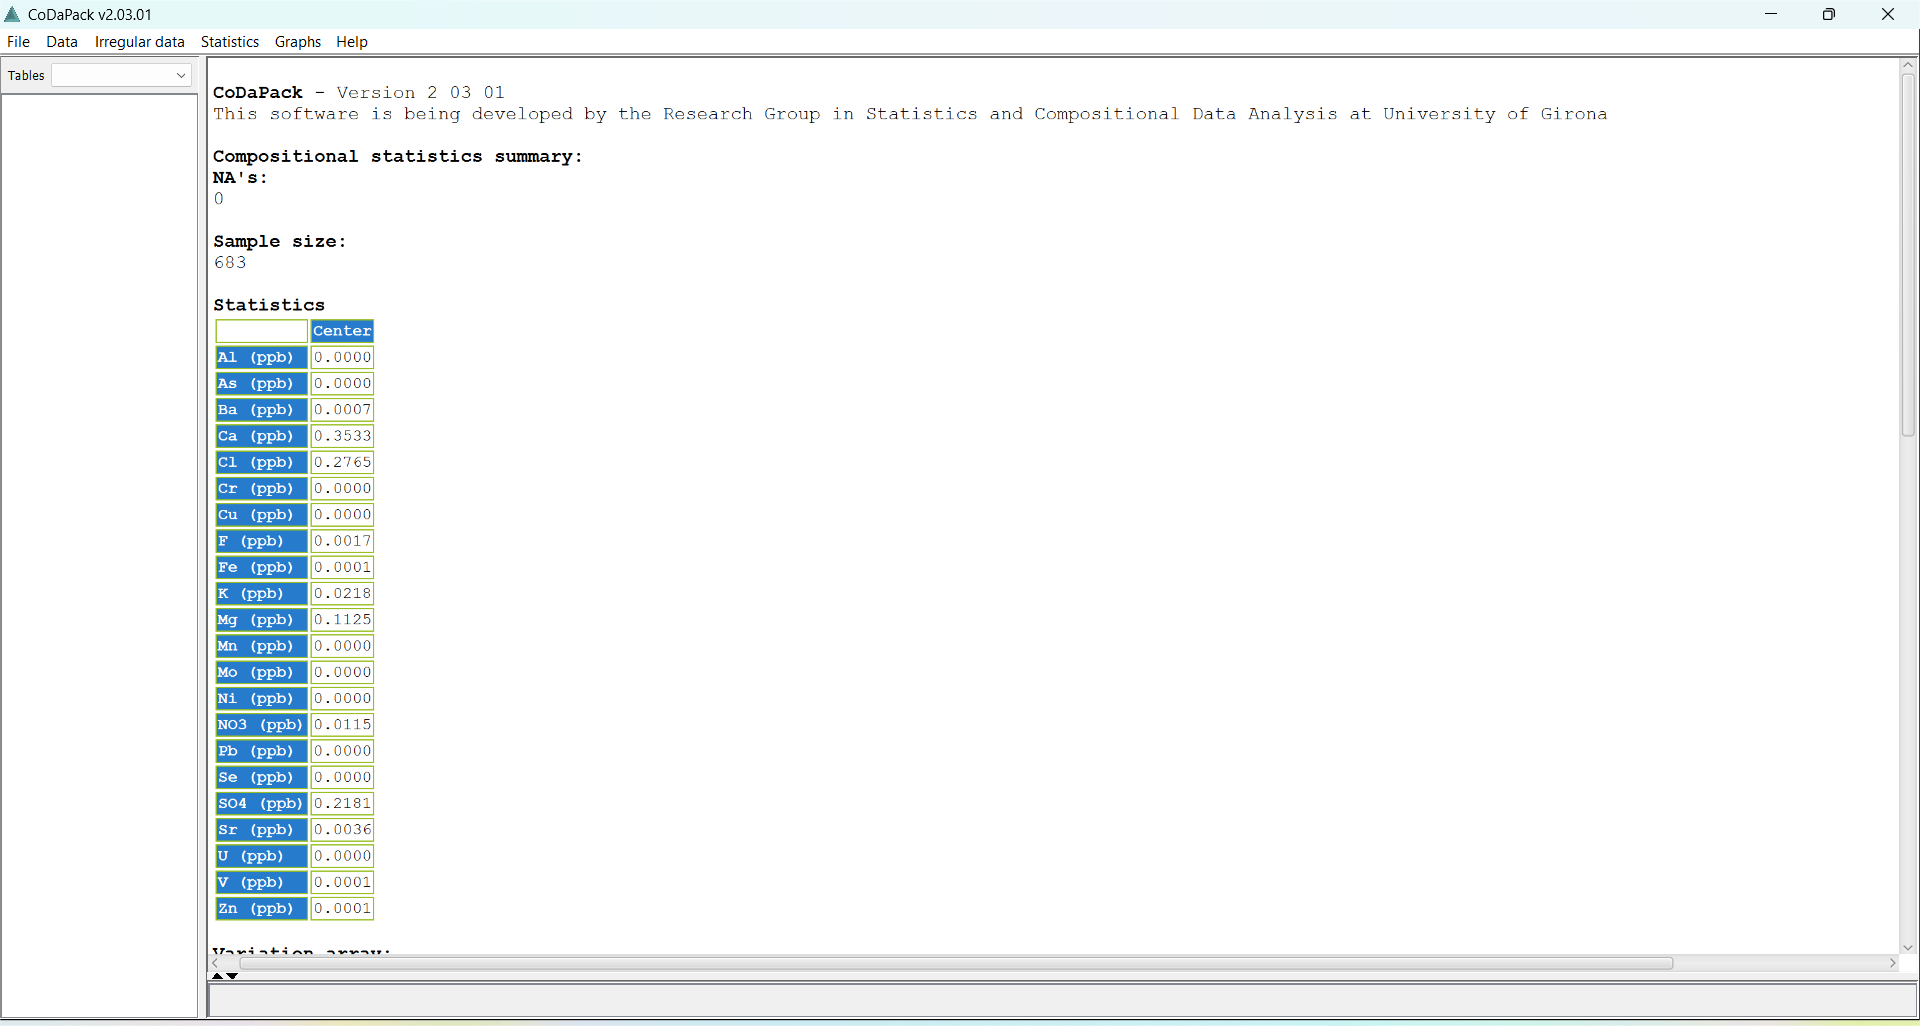

In [7]:
from IPython.display import display, Image
image_path = r"D:\RobertSichomba\HomeWork2\images\Screenshot (47).png"
display(Image(filename=image_path))

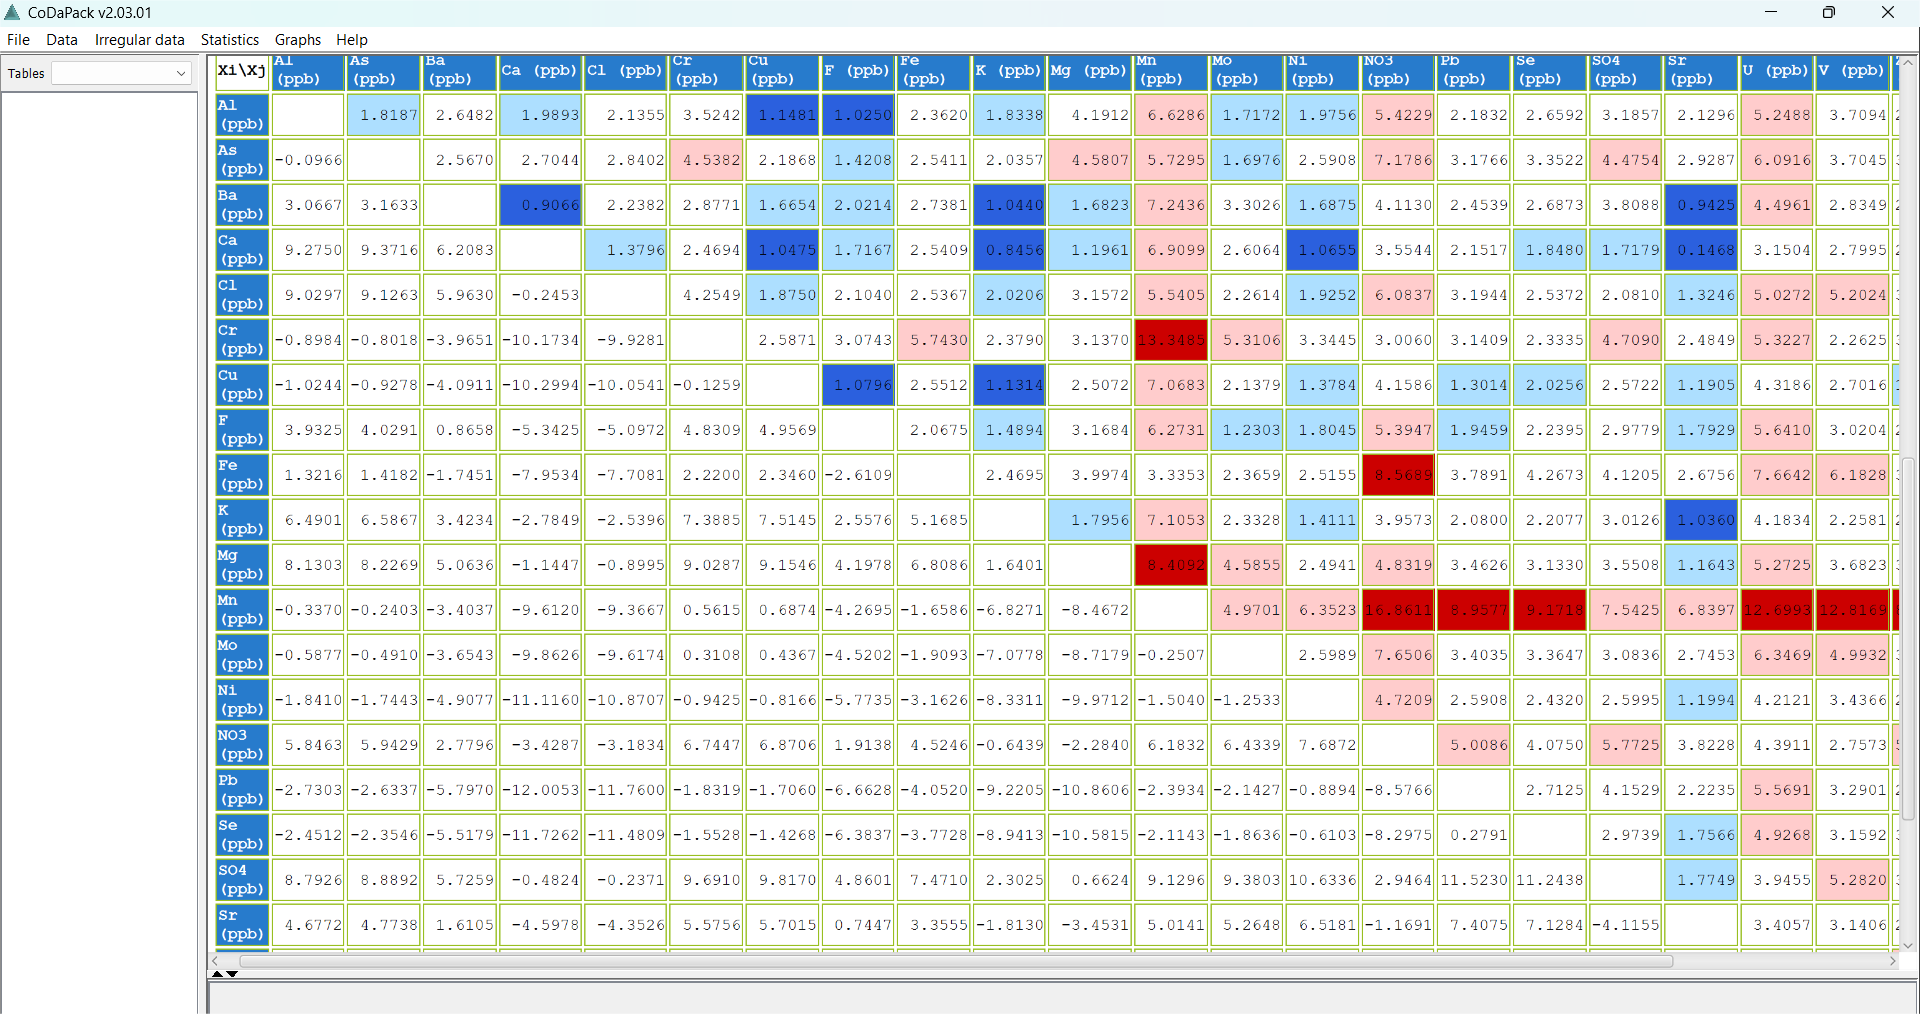

In [8]:
from IPython.display import display, Image
image_path = r"D:\RobertSichomba\HomeWork2\images\Screenshot (46).png"
display(Image(filename=image_path))

The Variation Array provides us with insight into the relationships between different chemical elements in our dataset through log-ratios. The high values, marked in red, indicate significant variation or variability in the corresponding log-ratio, meaning that the relative proportions of those two elements fluctuate greatly across the given dataset. 




The log-ratios I'd consider important to look at are Cr/Mn ratio which is particularly important since Mn acts as a key oxidant that converts Cr(III) to Cr(VI). High variation in this ratio suggests inconsistencies in Mn’s ability to oxidize Cr. Similarly, the Mn/NO3 ratio reflects a high variation so, I will consider it important. Another key ratio, Fe/NO3, highlights the role of nitrate in controlling redox potential in anoxic environments. The U/Mn ratio alos the Mn/Se ratio is high so, its a log-ratio of interest.

Relating these log-ratios to what is described in the background context of Cr(VI) geochemistry, this is particularly important because Cr(VI) is influenced by redox conditions, the presence of oxidizing or reducing agents, and competing electron acceptors, the high variation in Mn/Cr and Fe/NO3 suggests that these two metals do not have a consistent relationship, possibly due to fluctuating redox conditions. Since Mn is a strong oxidant that promotes the transformation of Cr(III) into Cr(VI), while Fe is often involved in reduction reactions, this could indicate dynamic redox cycling in the environment. 

Before before plotting scatter plots for log-ratios that I considered important, I firstly want to visualize the direct compositions of the key elements, which will provide insights into how these elements relate to each other in their original, untransformed states. The scatter plots before applying log-ratios can offer a foundational understanding of the raw relationships between key geochemical compositions. After that, log-ratio transformation will help normalize the data and provide more meaningful comparisons, especially in cases where the compositions are highly skewed or show strong variability jut as those seen in red boxes of the variation array generated in CODA above.

In this problem I'll consider the following compositions;

Mn (Manganese) with high values relationg to other compositions and plays a role in redox processes and Cr oxidation, U (Uranium), which is influenced by redox conditions, Se (Selenium), which can also play a role in redox processes, Fe (Iron), Mg (Magnisium), V (Vanadium) and Zn (Zinc), which may provide additional insights into trace element cycling.

Before applying any log-ratio transformations, plotting the compositions directly to visualize the raw relationships between elements will be important. The scatter plots for Mn Vs Cr, NO3 vs Fe, Mg vs Mn, Mn vs U, Mn vs NO3, Mn vs V, and Mn vs Zn to understand their direct relationships. I have chosen these relationships because of their high variability on the varriation array.

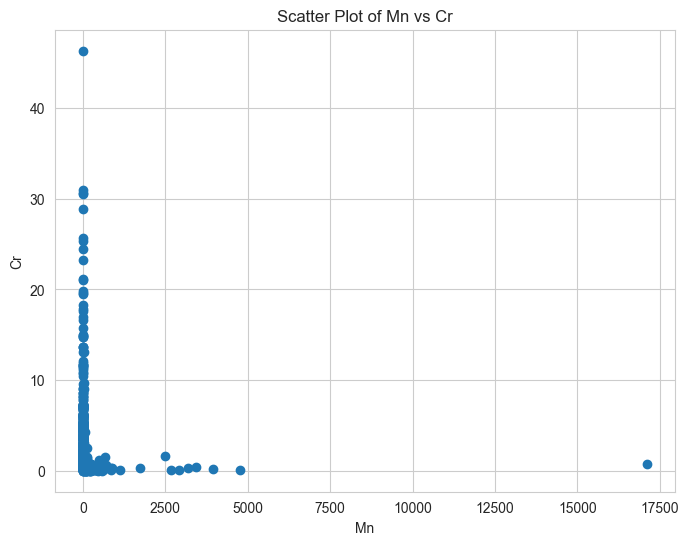

In [28]:
# Scatter plot of Mn vs Cr
composition1 = data['Mn (ppb)']
composition2 = data['Cr (ppb)']
name1 = 'Mn'
name2 = 'Cr'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



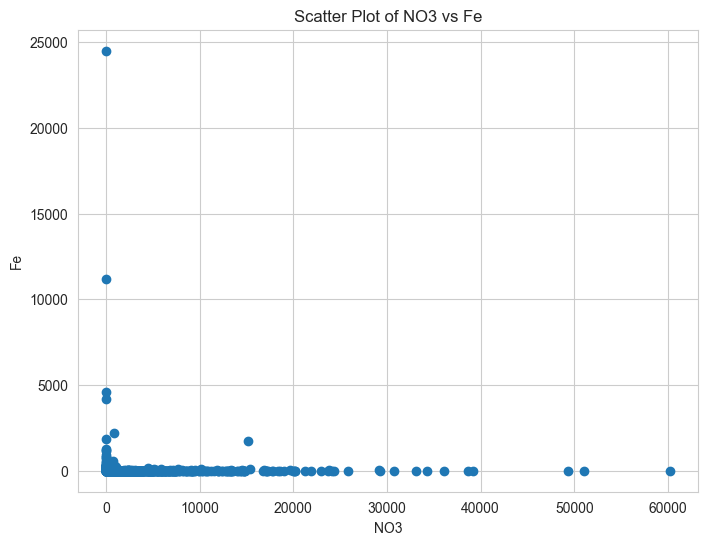

In [29]:
# Scatter plot before log-ratio for 'NO3' Vs 'Fe'
composition1 = data['NO3 (ppb)']
name1 = 'NO3'
composition2 = data['Fe (ppb)']
name2 = 'Fe'

plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()




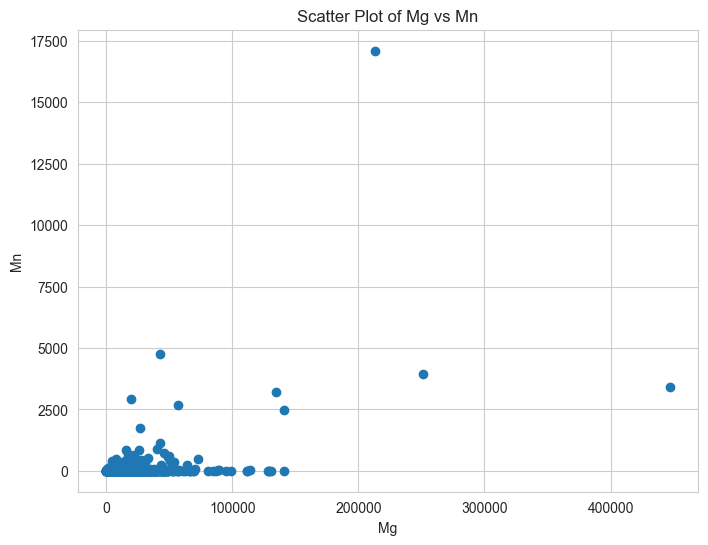

In [30]:
# Scatter plot before log-ratio for 'Mg' vs 'Mn'
composition1 = data['Mg (ppb)']
name1 = 'Mg'
composition2 = data['Mn (ppb)']
name2 = 'Mn'

plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()

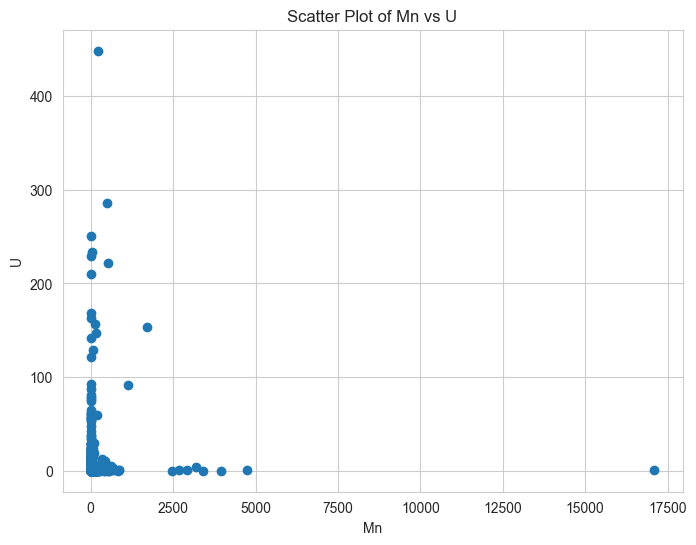

In [31]:
# Scatter plot of Mn vs U
composition1 = data['Mn (ppb)']
composition2 = data['U (ppb)']
name1 = 'Mn'
name2 = 'U'
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



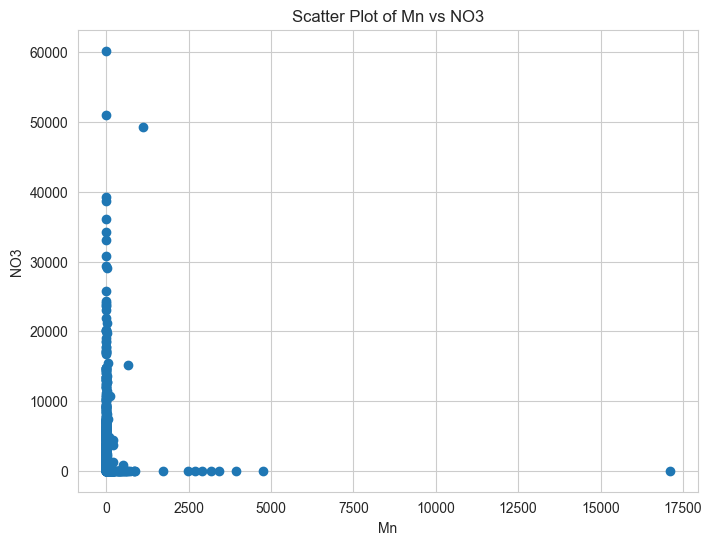

In [32]:
# Scatter plot of Mn vs NO3
composition1 = data['Mn (ppb)']
composition2 = data['NO3 (ppb)']
name1 = 'Mn'
name2 = 'NO3' 
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



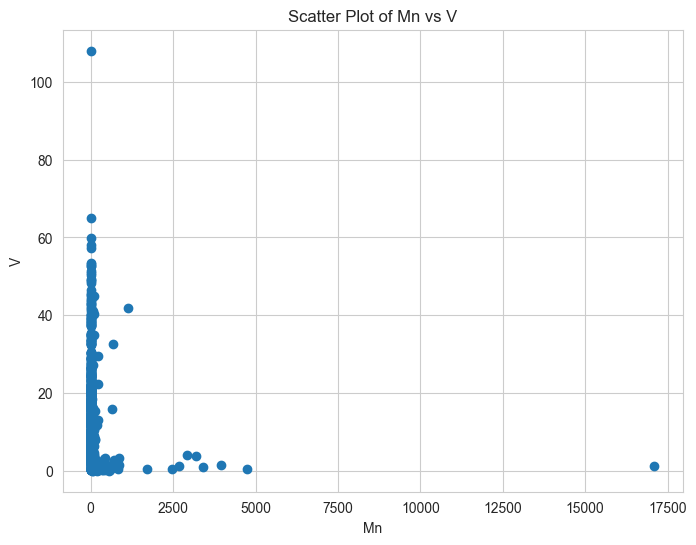

In [33]:
# Scatter plot of Mn vs V
composition1 = data['Mn (ppb)']
composition2 = data['V (ppb)']
name1 = 'Mn'
name2 = 'V' 
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



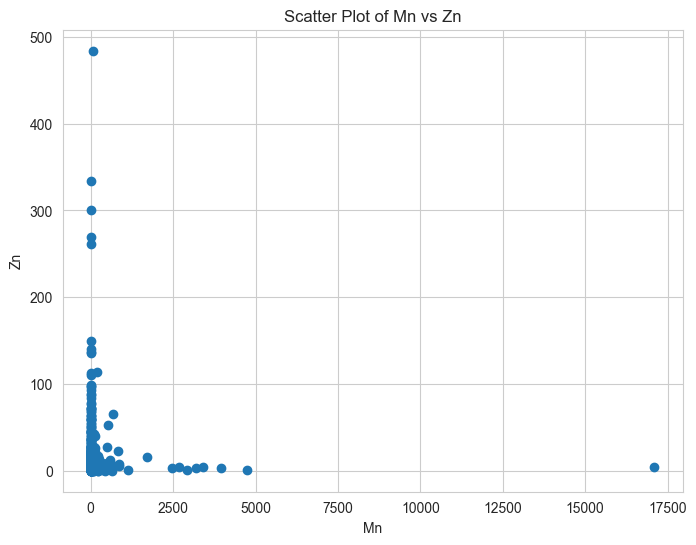

In [34]:
# Scatter plot before log-ratio of Mn vs Zn
composition1 = data['Mn (ppb)']
composition2 = data['Zn (ppb)']
name1 = 'Mn'
name2 = 'Zn' 
plt.figure(figsize=(8, 6))
plt.scatter(composition1, composition2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()



Here we now plot Scatter Plots of Important Log-Ratios, below are some the important log ratios I considered from the varition array due to their high values.

- log_ratio1 = np.log(data['Cr (ppb)'] / data['Mn (ppb)']

name1 = 'log(Cr/Mn)'

- log_ratio2 = np.log(data['Mn (ppb)'] / data['NO3 (ppb)']):

name2 = 'log(Mn/NO3)'

- log_ratio3 = np.log(data['Fe (ppb)'] / data['NO3 (ppb)'])

name3 = 'log(Fe/NO3)'

- log_ratio4 = np.log(data['U (ppb)'] / data['Mn (ppb)'])

name4 = 'log(U/Mn)'

- log_ratio5 = np.log(data['Mn (ppb)'] / data['Se (ppb)'])

name5 = 'log(Mn/Se)'



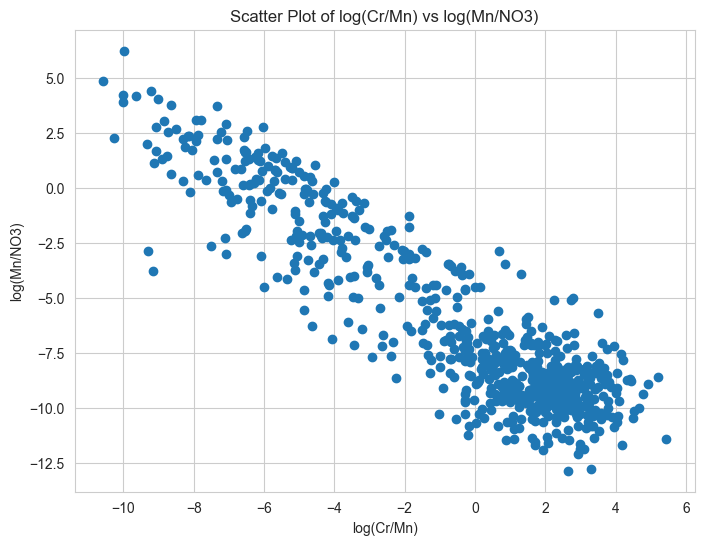

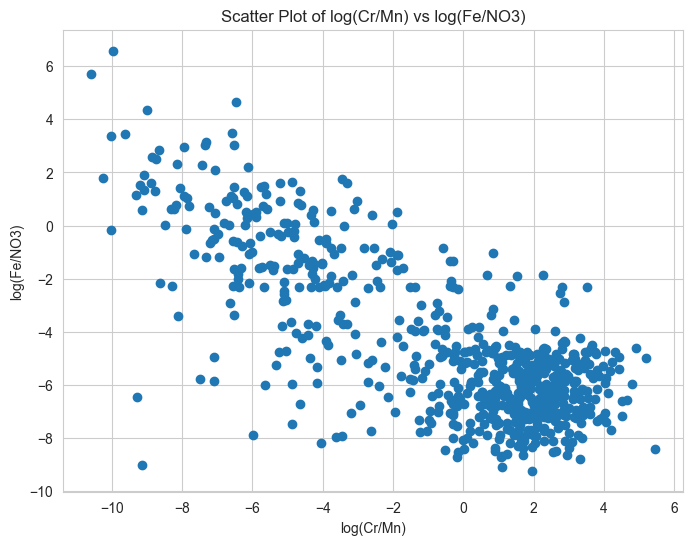

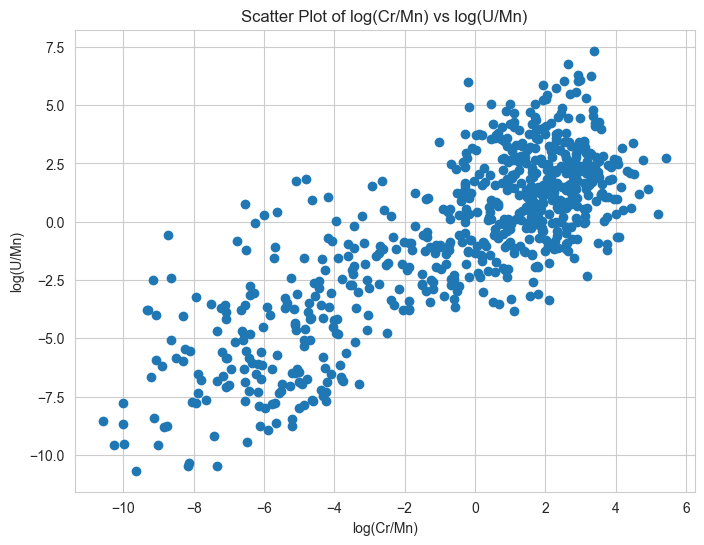

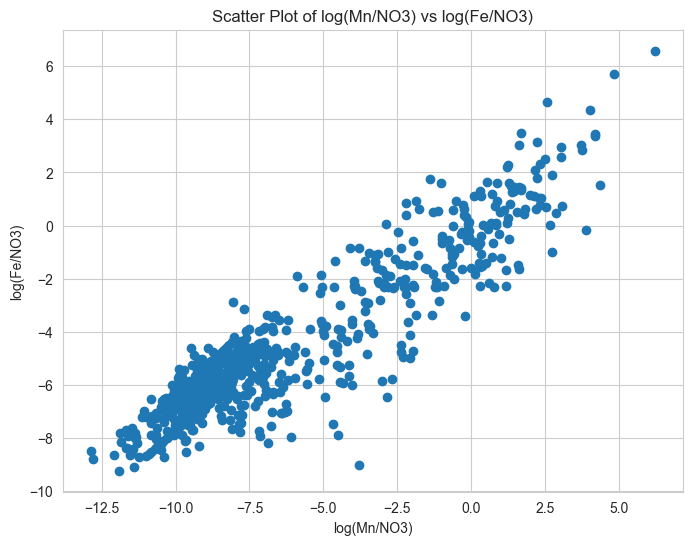

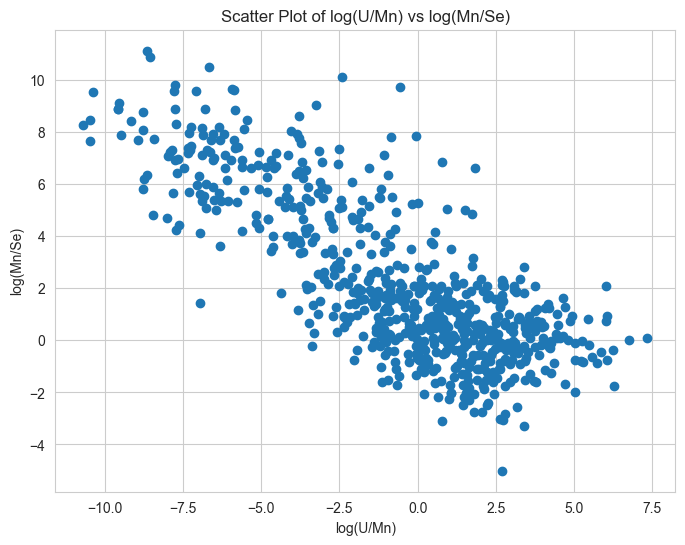

In [44]:
# Here I Computed log-ratios as shown in the guide notebook 
# Then made scatter plots for different combinations

log_ratio1 = np.log(data['Cr (ppb)'] / data['Mn (ppb)'])
name1 = 'log(Cr/Mn)'
log_ratio2 = np.log(data['Mn (ppb)'] / data['NO3 (ppb)'])
name2 = 'log(Mn/NO3)'
log_ratio3 = np.log(data['Fe (ppb)'] / data['NO3 (ppb)'])
name3 = 'log(Fe/NO3)'
log_ratio4 = np.log(data['U (ppb)'] / data['Mn (ppb)'])
name4 = 'log(U/Mn)'
log_ratio5 = np.log(data['Mn (ppb)'] / data['Se (ppb)'])
name5 = 'log(Mn/Se)'

# Scatter plot for 'log(Cr/Mn)' and 'log(Mn/NO3)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio1, log_ratio2)
plt.xlabel(name1)
plt.ylabel(name2)
plt.title(f'Scatter Plot of {name1} vs {name2}')
plt.show()

# Scatter plot for 'log(Cr/Mn)' and 'log(Fe/NO3)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio1, log_ratio3)
plt.xlabel(name1)
plt.ylabel(name3)
plt.title(f'Scatter Plot of {name1} vs {name3}')
plt.show()

 # Scatter plot for 'log(Cr/Mn)' and 'log(U/Mn)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio1, log_ratio4)
plt.xlabel(name1)
plt.ylabel(name4)
plt.title(f'Scatter Plot of {name1} vs {name4}')
plt.show()

# Scatter plot for 'log(Mn/NO3)' and 'log(Fe/NO3)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio2, log_ratio3)
plt.xlabel(name2)
plt.ylabel(name3)
plt.title(f'Scatter Plot of {name2} vs {name3}')
plt.show()

# Scatter plot for'log(U/Mn)' and 'log(Mn/Se)'

plt.figure(figsize=(8, 6))
plt.scatter(log_ratio4, log_ratio5)
plt.xlabel(name4)
plt.ylabel(name5)
plt.title(f'Scatter Plot of {name4} vs {name5}')
plt.show()


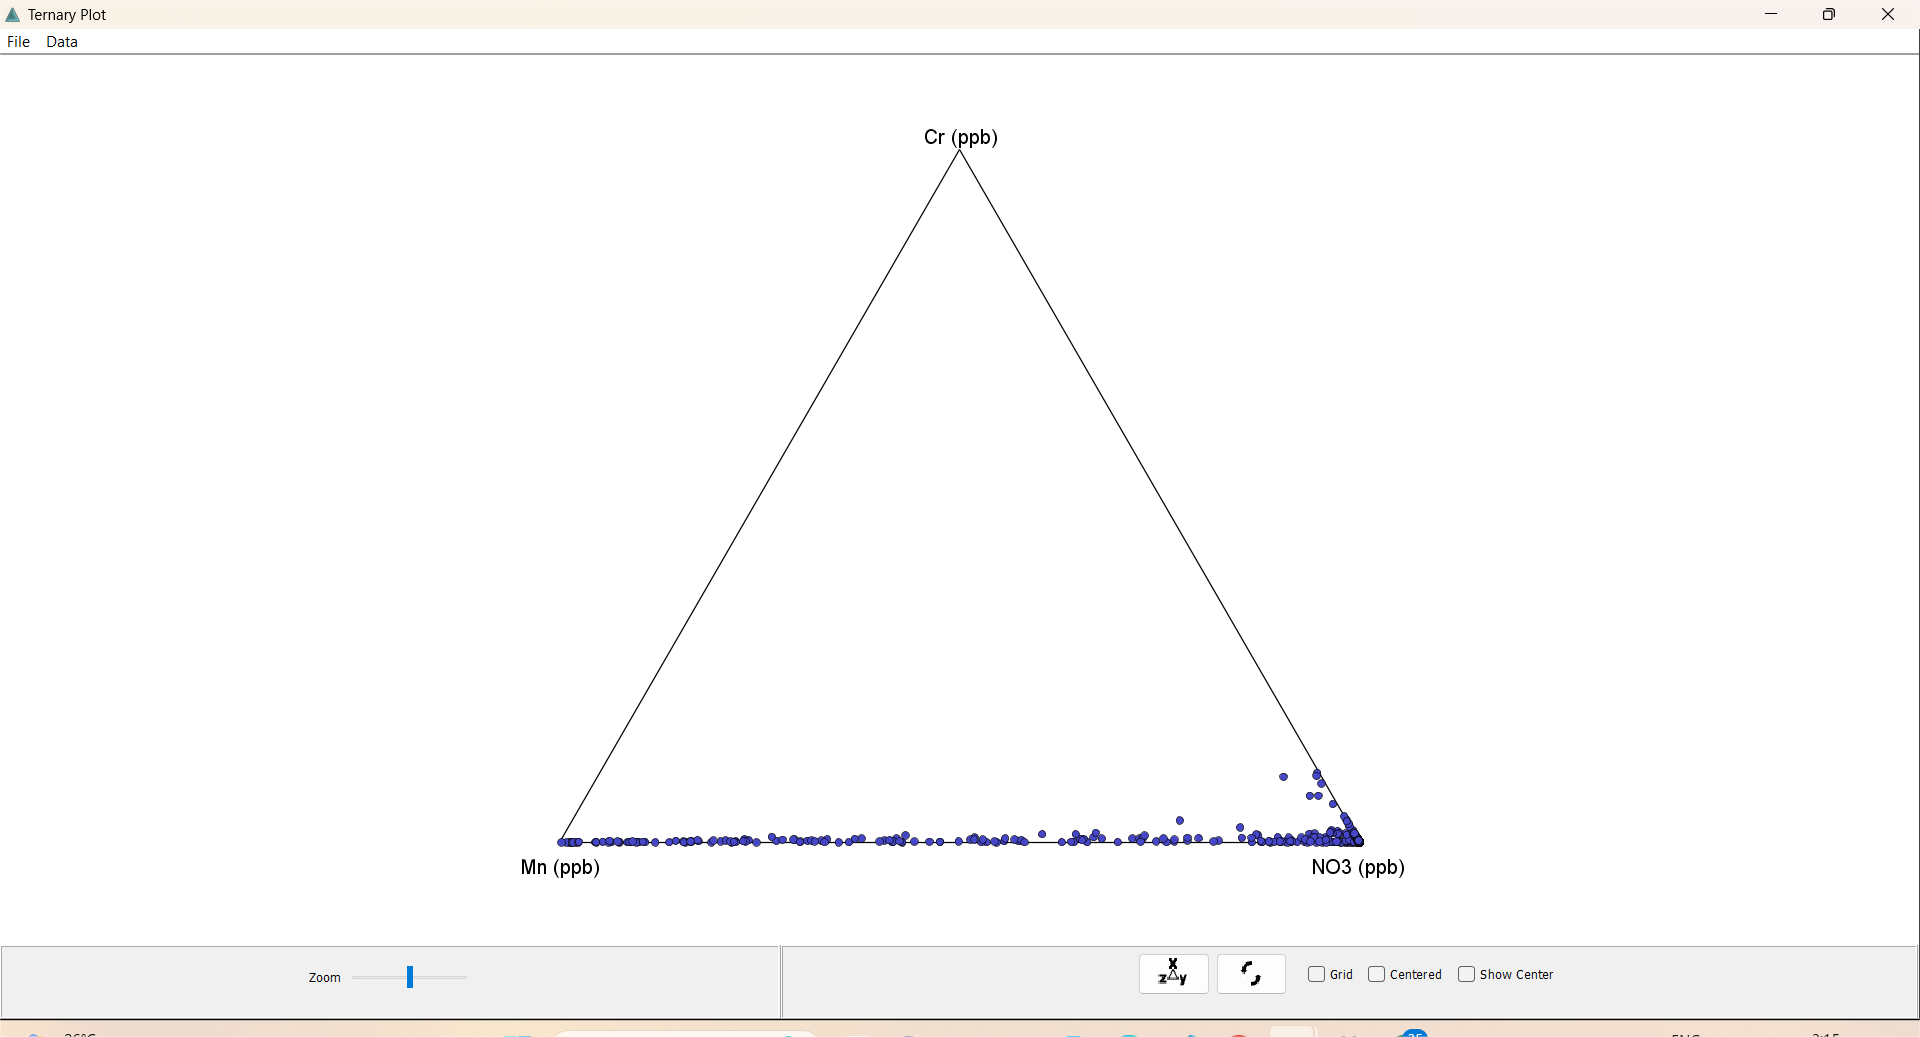

In [46]:
from IPython.display import display, Image
image_path = r"D:\RobertSichomba\HomeWork2\images\Screenshot (49).png"
display(Image(filename=image_path))

As seen from the plot above clustering is more near NO3. this for ternary for Cr-Mn-NO3.

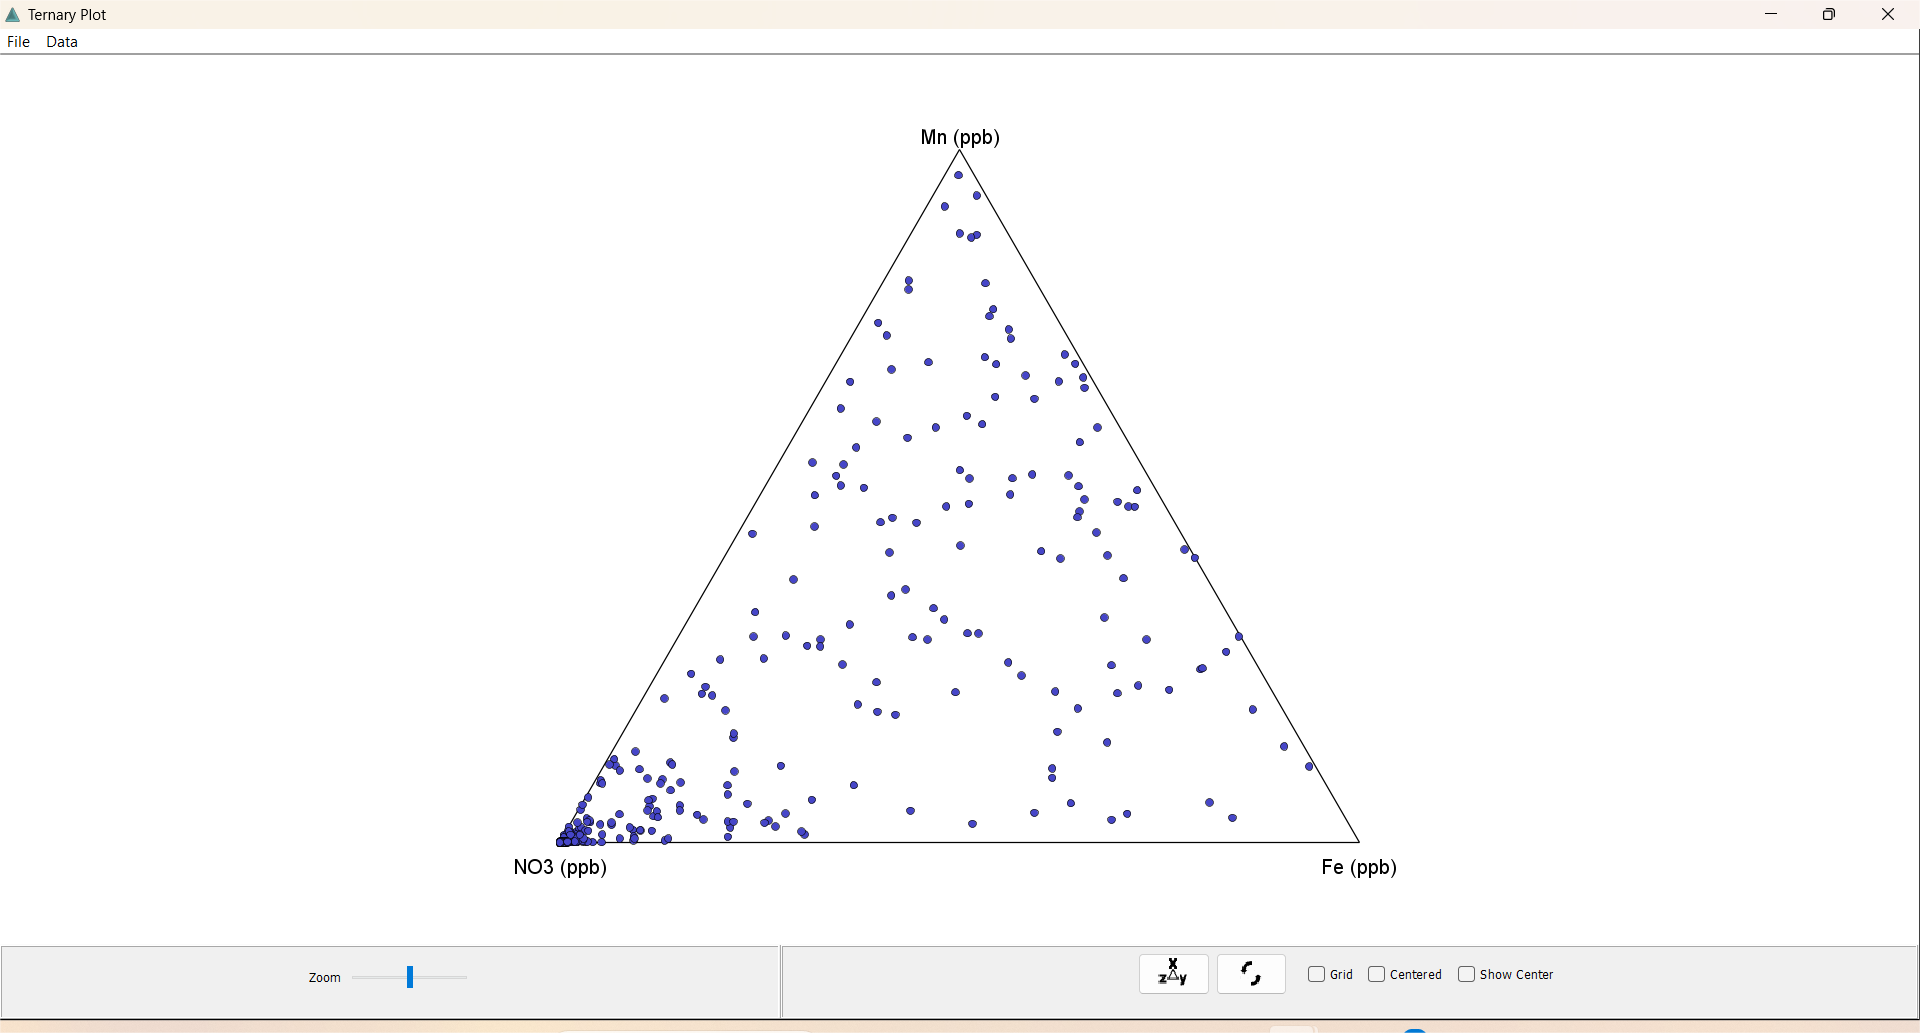

In [47]:
from IPython.display import display, Image
image_path = r"D:\RobertSichomba\HomeWork2\images\Screenshot (50).png"
display(Image(filename=image_path))

Even Mn-NO3-Fe As seen from the plot above clustering is more near NO3. .

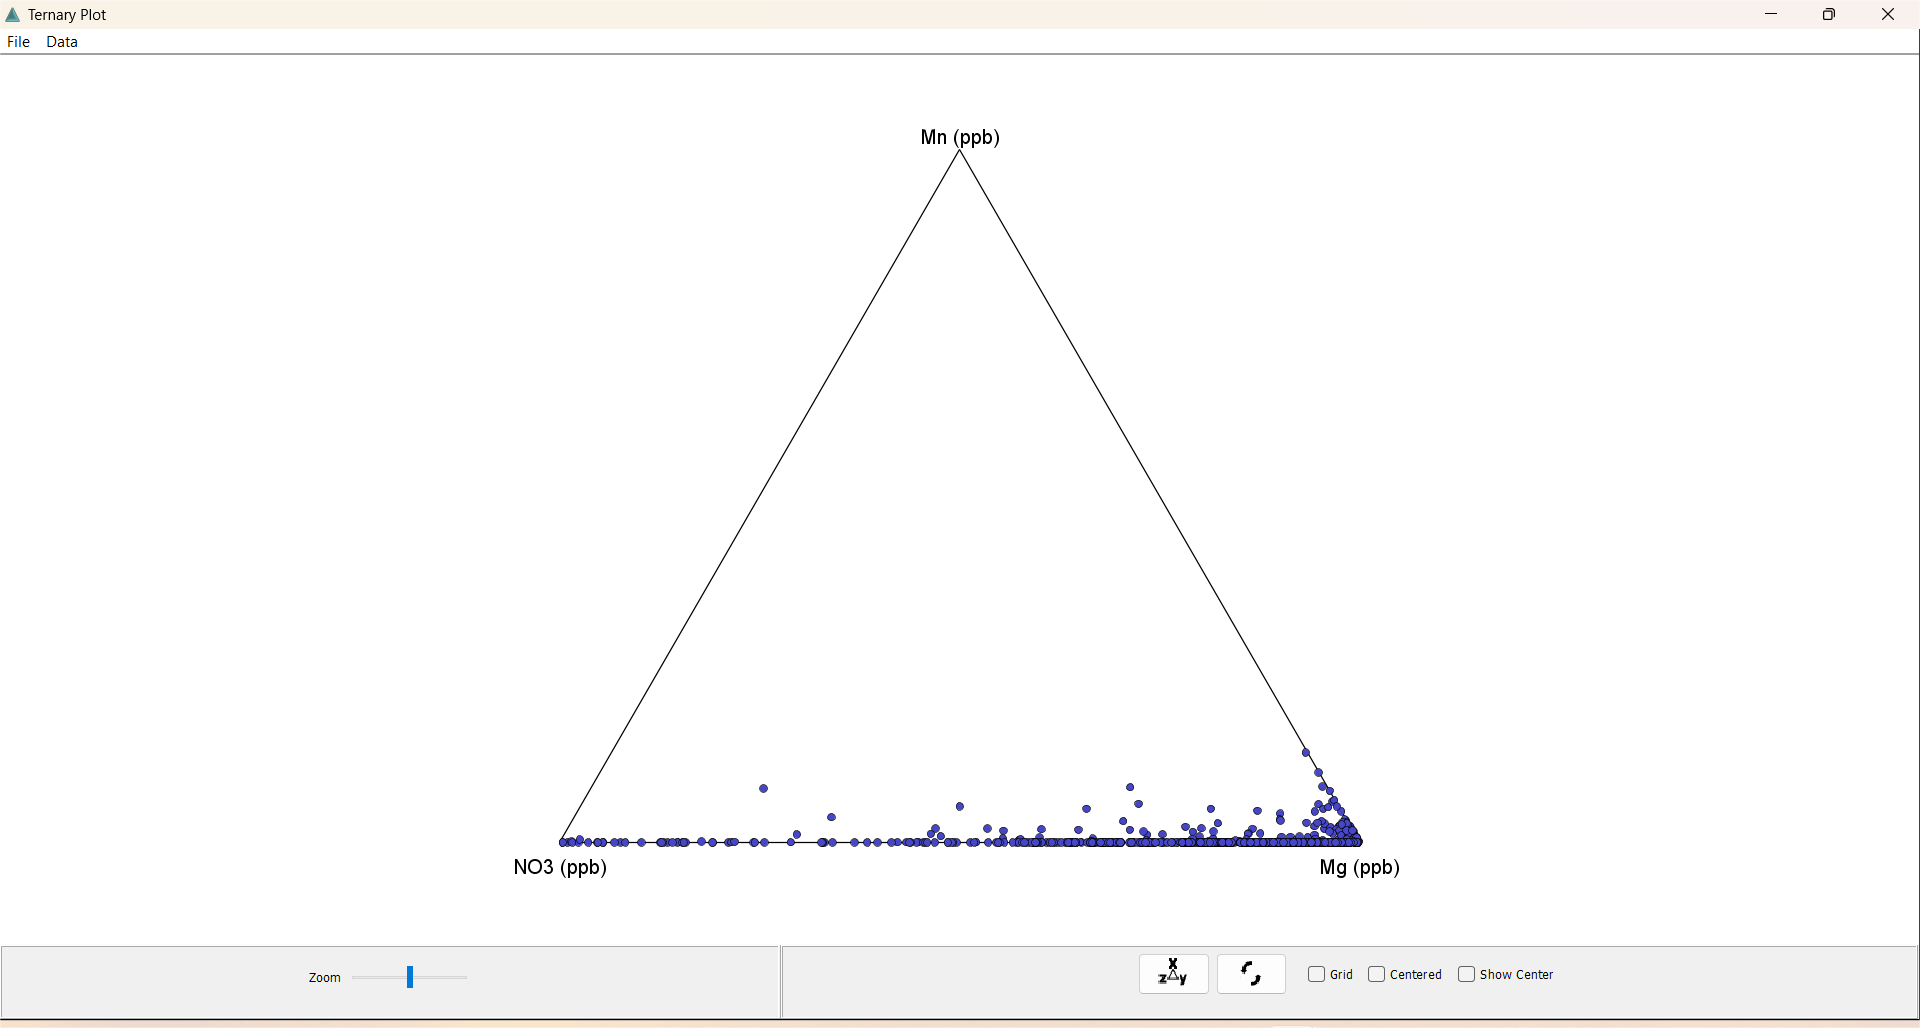

In [49]:
from IPython.display import display, Image
image_path = r"D:\RobertSichomba\HomeWork2\images\Screenshot (52).png"
display(Image(filename=image_path))

As seen from the plot of Mn-NO3-Mg above clustering is more near Mg

Yes, ternary diagrams require centering however, CoDA Pack handles this automatically when generating ternary diagrams. All I had to do was select the three components of interest for the ternary plots.



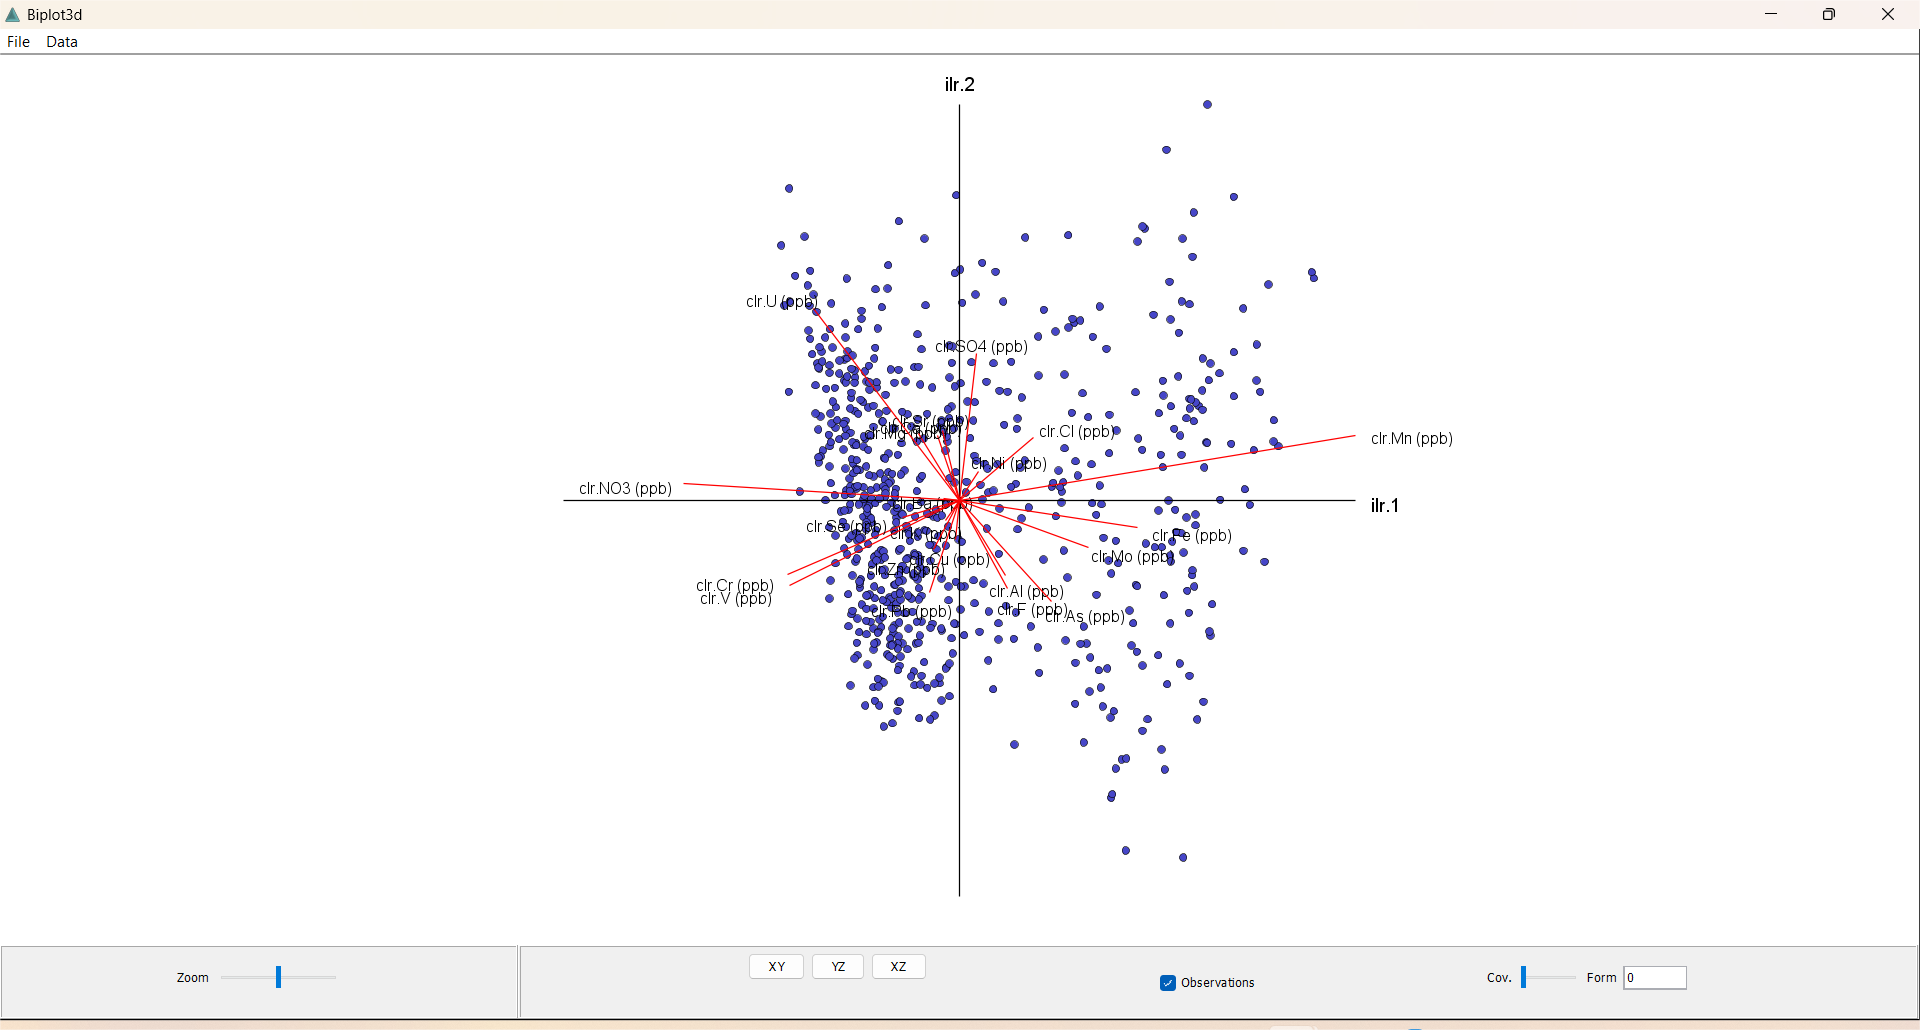

In [50]:
from IPython.display import display, Image
image_path = r"D:\RobertSichomba\HomeWork2\images\Screenshot (53).png"
display(Image(filename=image_path))

Above is the CRL Biplot, as it can be seen we have Mn with the longest red line (Vector) simply indicating that it is the most varying component. Followed by U and NO3. This biplot also shows positive and negative correlations among the elements. If the vectors or rather red lines point in the same direction, then we have a positive correlation for these respective elements and if they point in opposite directions well there is a negative correlation. From the biplot it is evident that Cr, Zn, Se, Pb point in the same direction indicating a positive correlation. While Mn and NO3 are pointing in opposite directions entelling there is a negative correlation between these elements.

The Biplot above has also shown some levels of clusters of the elements, especially those that are positively correlated. This is important and it has been well noted.

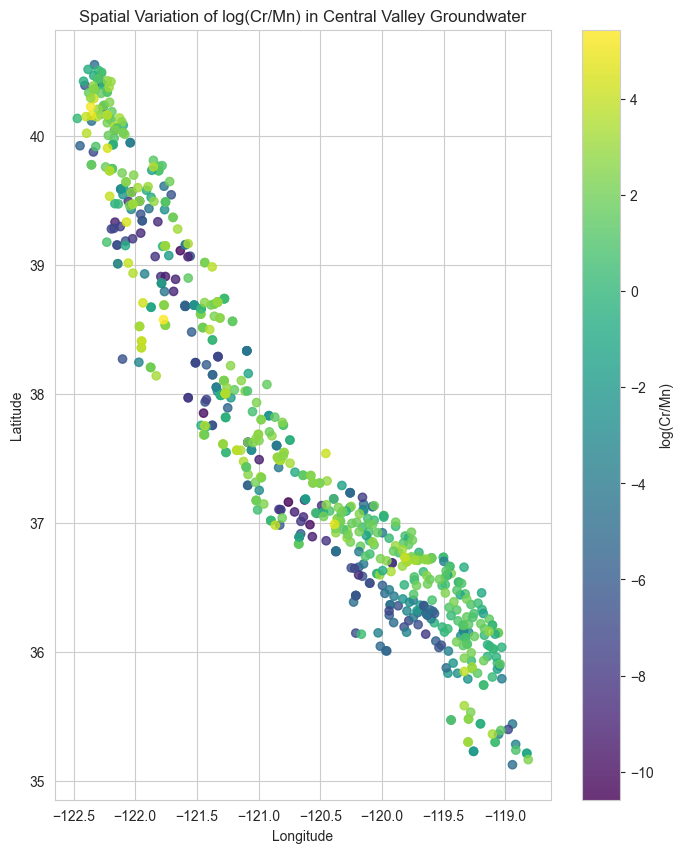

In [54]:
data.columns = data.columns.str.strip()

# Here we replace zeros to avoid the computation of log(0)
data = data.replace(0, 0.1)

# My considered important log-ratio is (Cr/Mn)
log_ratio = np.log(data['Cr (ppb)'] / data['Mn (ppb)'])
name = 'log(Cr/Mn)'

fig, ax = plt.subplots(1, 1, figsize=(8, 10))
plot1 = ax.scatter(data['Longitude'], data['Latitude'], c=log_ratio, cmap='viridis', alpha=0.8)
plt.colorbar(plot1, ax=ax, label=name)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')  
ax.set_title(f"Spatial Variation of {name} in Central Valley Groundwater")
plt.show()

From the plot some of the key observations are that; high log(Cr/Mn) values (yellow) cluster are concentrated in the northeastern Central Valley, suggesting localized Cr(VI) hotspots. Low values of log(Cr/Mn) (purple) dominate the mid location of the map western valley. 

As for the combination of plots to report or rather recommended to the geochemist will include; CLR Biplot for easy visualization of element correlations, clusters and variability, A spatial Map of log(Cr/Mn) for geographic hotspots, variation array that Identifies high-variance log-ratios which are important for this analysis, and ternary Diagrams such as (Cr-Mn-NO3) for compositional balance in oxic/anoxic zones.